In [62]:
import gsw 

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
%matplotlib inline
from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

# import my modules
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt 



In [63]:

CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
phiHyd = '/ocean/kramosmu/MITgcm/TracerExperiments/BARKLEY/run02/phiHydGlob.nc'
pout = Dataset(phiHyd)
CGridOut = Dataset(CGrid)

# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 3 # number of tracers in run

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
MaskC = rout.getMask(CGrid, 'HFacC')
rA = rout.getField(CGrid, 'rA')

Tp = pout.variables['T']
bathy = rout.getField(CGrid, 'Depth')



In [64]:
# STATIONS
ys = [262,220,262,227,100,245,245,262,220]
xs = [60,60,180,180,180,160,200,300,300]
stations = ['UpSh','UpSl','CH','CM','CO','UpC','DnC','DnSh','DnSl']

#All experiments in CNT and 3D including no canyon one (run07)
expList = [#'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run10',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16']
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17']
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18',
           '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19']
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run20',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06',
           #'/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07']
           #'/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07']
TrList = [#['Tr1'],#run02
	      'Tr1',#run03
	      #['Tr1'],#run04
	      #['Tr1'],#run09
	      #['Tr1'],#run10
	      #'Tr2',#run11
	      #'Tr3',#run12
	      #'Tr1',#run14
	      #'Tr1',#run15 
	      #'Tr1']#run16 
	      #'Tr3']#run17
	      'Tr1',#run18
	      'Tr1']#run19
	      #['Tr2'],#run20
	      #'Tr1',#run04 3D
	      #'Tr1',#run05 3D
	      #'Tr1',#run06 3D
	      #'Tr1'] #run07 3D

expNames = [#'CNTDIFF_run02',
           'CNTDIFF_run03',
           #'CNTDIFF_run04',
           #'CNTDIFF_run09',
           #'CNTDIFF_run10',
           #'CNTDIFF_run11',
           #'CNTDIFF_run12',
           #'CNTDIFF_run14',
           #'CNTDIFF_run15',
           #'CNTDIFF_run16']
           #'CNTDIFF_run17']
           'CNTDIFF_run18',
           'CNTDIFF_run19']
           #'CNTDIFF_run20',
           #'3DDIFF_run04',
           #'3DDIFF_run05',
           #'3DDIFF_run06',
           #'3DDIFF_run07']
           #'CNTDIFF_run07']



In [65]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')

colors = [#"fresh green", # run02
          "soft green", # run03
          #"shamrock green",# run04
          #"dark mint green",# run11
          #"peacock blue",# run12
          #"sapphire",# run14
          #"nice blue",# run15
          #"coral"]# run16
          #"tangerine"]# run17
          "blood orange",# run18
          "scarlet"]# run19
          #"dark plum",# run20
          #"purplish",# run04 3D
          #"cerise",# run05 3D
          #"amethyst",# run06 3D
          #"lavender pink"]# run07 3D

color_pal = sns.xkcd_palette(colors)

In [66]:
def plotN(ax,z,N,N0,lab,title):
    ax.plot(-N,z,label=lab)
    ax.plot(-N0,z,'--',color='grey')
    ax.set_title(title)
    ax.set_xlabel('$Tr$ $N^2$ ($ s^{-2}$)')
    ax.set_ylabel('depth (m)')



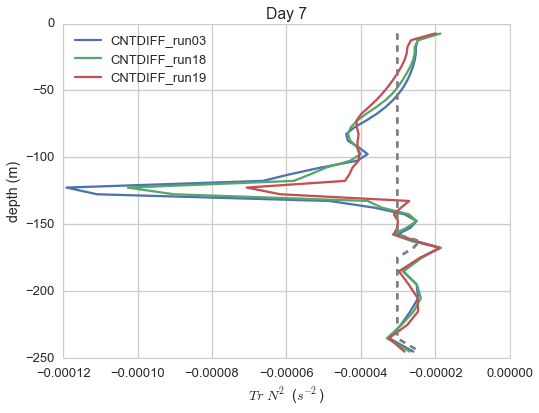

In [67]:
fig1= plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)
sns.set_palette(color_pal)
for runs in expNames:
    key = ['N2_tt14']
    key0 = ['N2_tt00']
   
    sname = 'DnC'
    filename1 = ('results/metricsDataFrames/N2_%s_%s.csv' % (runs,sname))
    
    df = pd.read_csv(filename1)
    col = df[key]
    col0 = df[key0]
    plotN(ax1,rc[1:-1],col,col0,runs,'Day 7')


ax1.legend(loc=0)   

plt.show()
   
        
        
        


In [68]:
def plotAdvN2(st):
    
    fig1= plt.figure(figsize=(24,8))

    ax1 = plt.subplot(1,4,1)
    ax2 = plt.subplot(1,4,2)
    ax3 = plt.subplot(1,4,3)
    ax4 = plt.subplot(1,4,4)

    axs = [ax1,ax2,ax3,ax4]

    sns.set_palette(color_pal)
    #sns.set_palette('Set1',8)
    keys = ['NTr_tt06','NTr_tt10','NTr_tt14','NTr_tt18']
    key0 = ['NTr_tt00']

    for runs,trnum in zip(expNames,TrList):
    

        for key,a in zip(keys,axs):

            sname = st#'CM'
            filename1 = ('results/metricsDataFrames/N2Tr_%s_%s_%s.csv' % (trnum,runs,sname))

            df = pd.read_csv(filename1)
            col = df[key]
            col0 = df[key0]
            plotN(a,rc[1:-1],col,col0,runs,key)


    ax4.legend(loc=0)   
    plt.show()
    
    return fig1



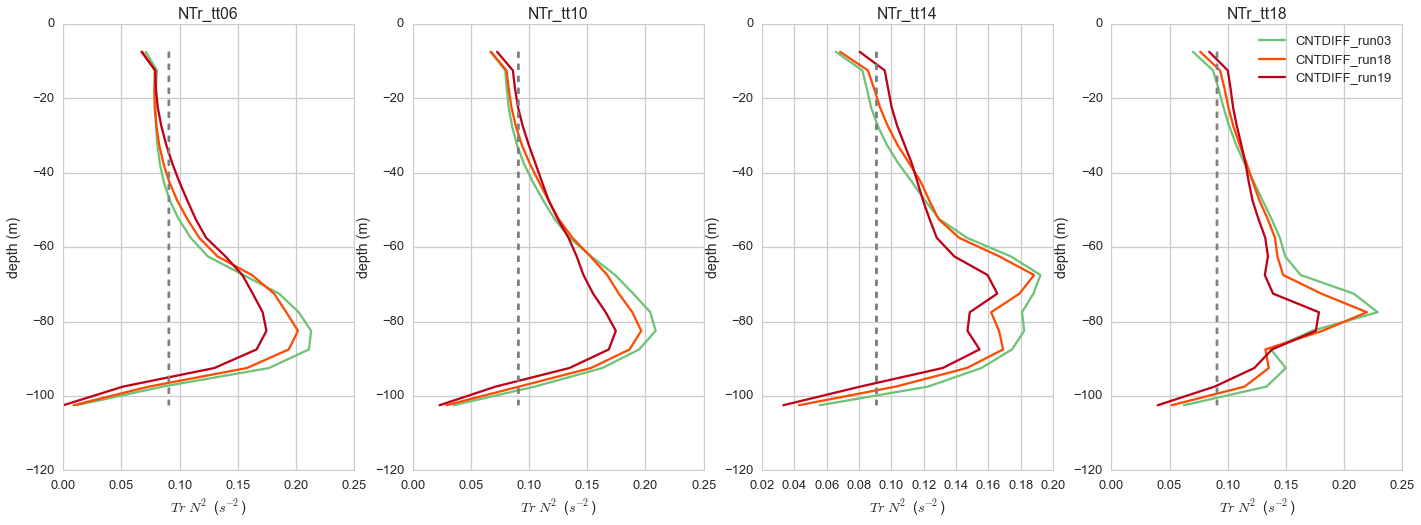

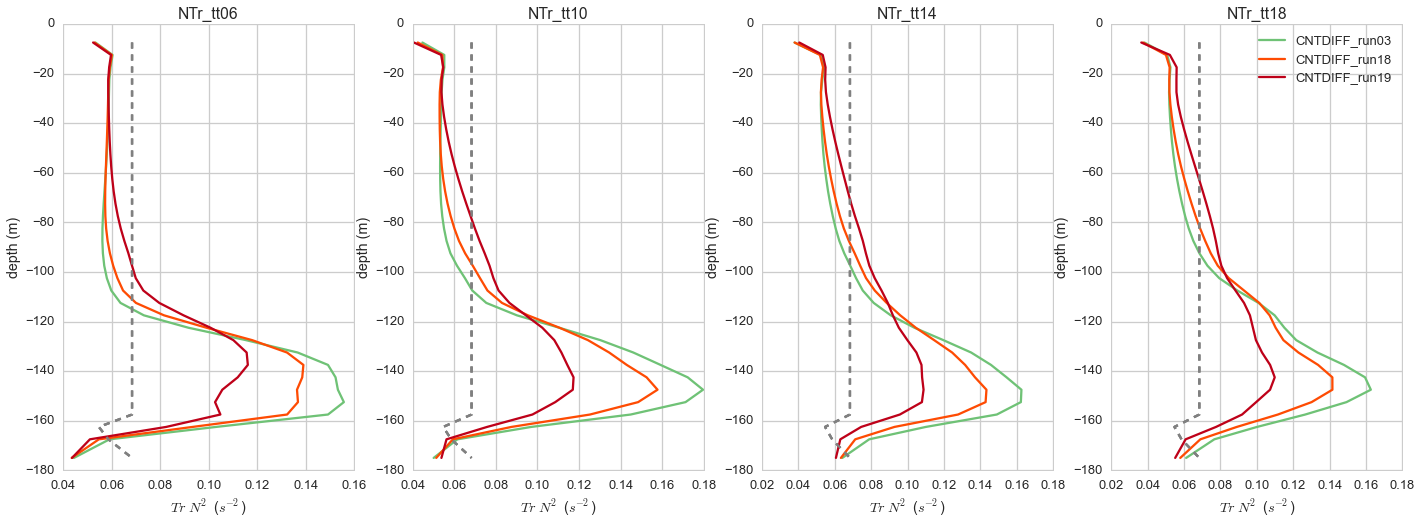

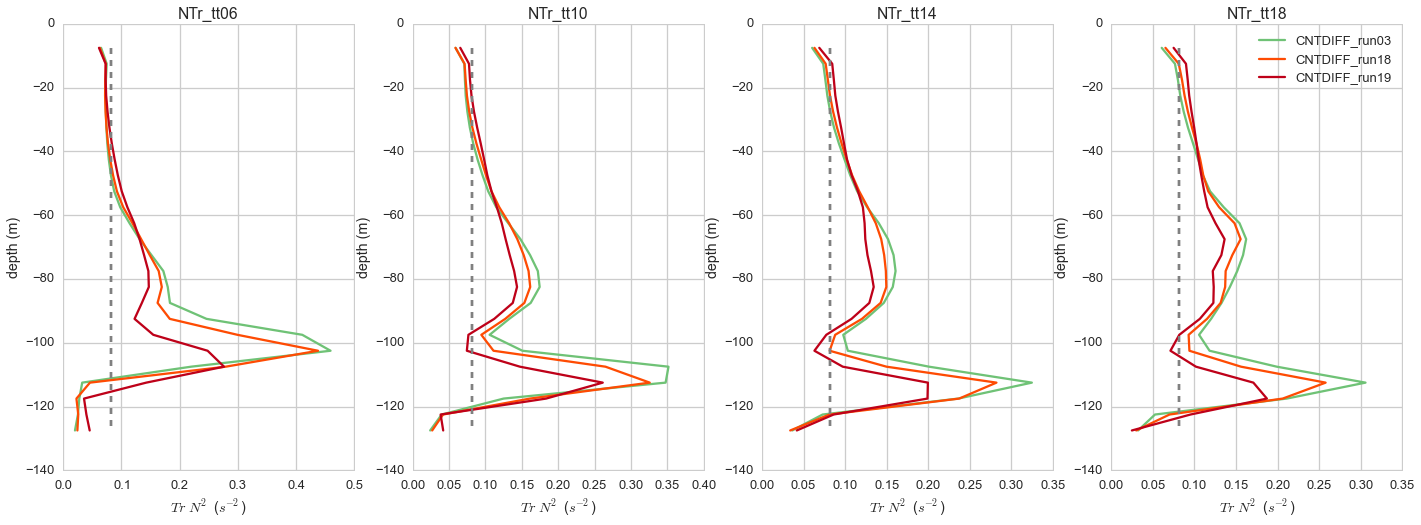

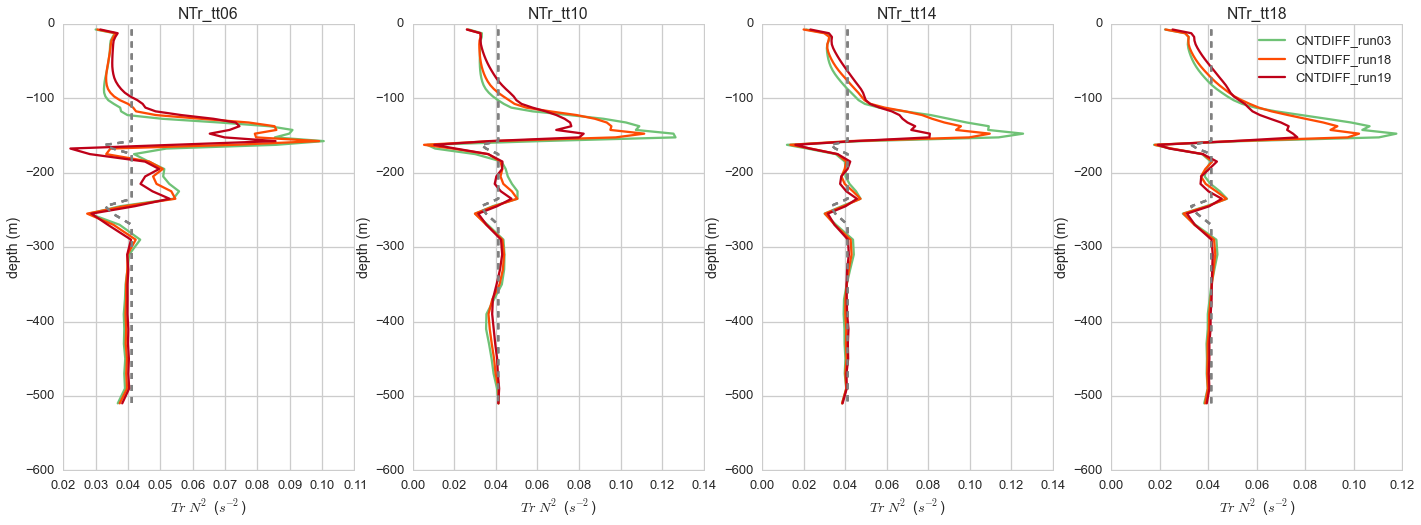

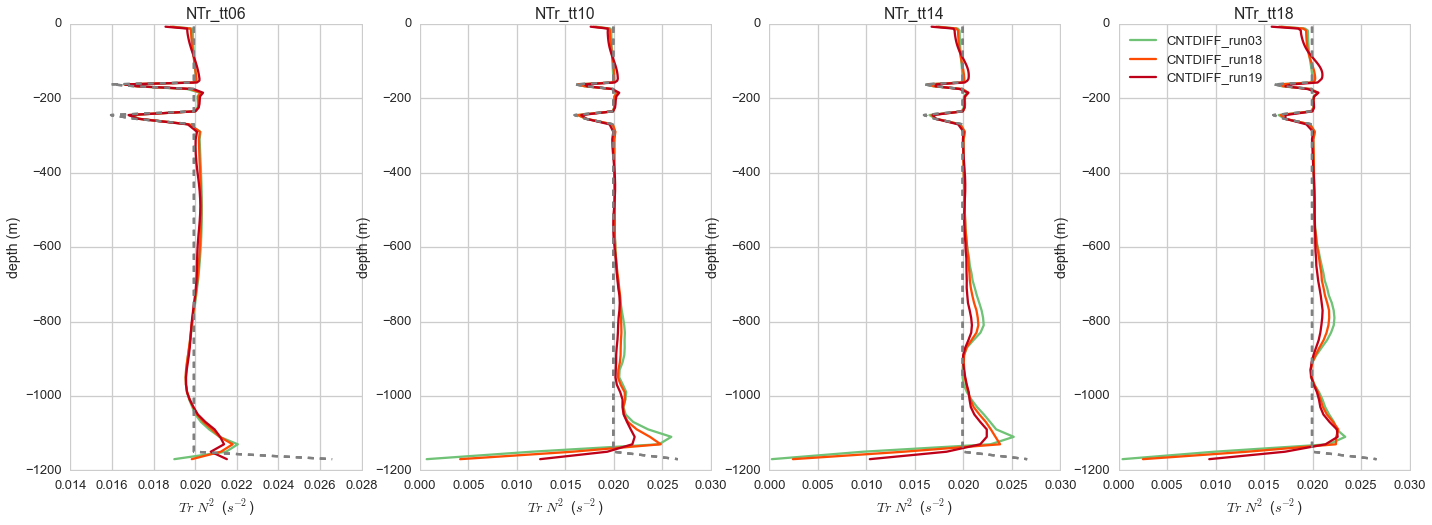

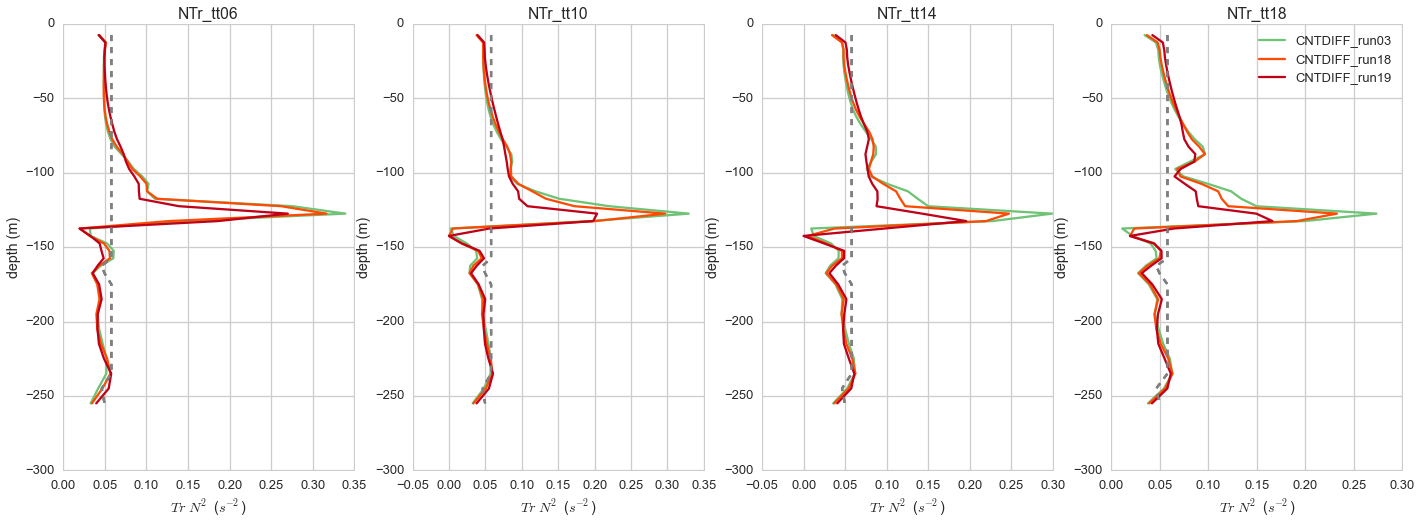

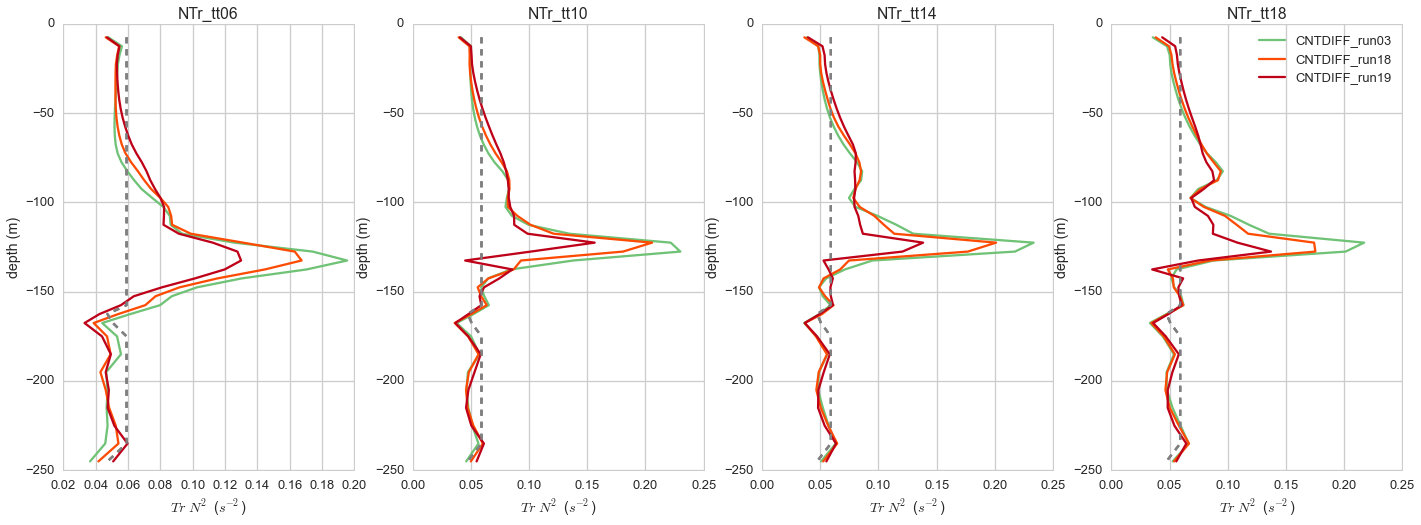

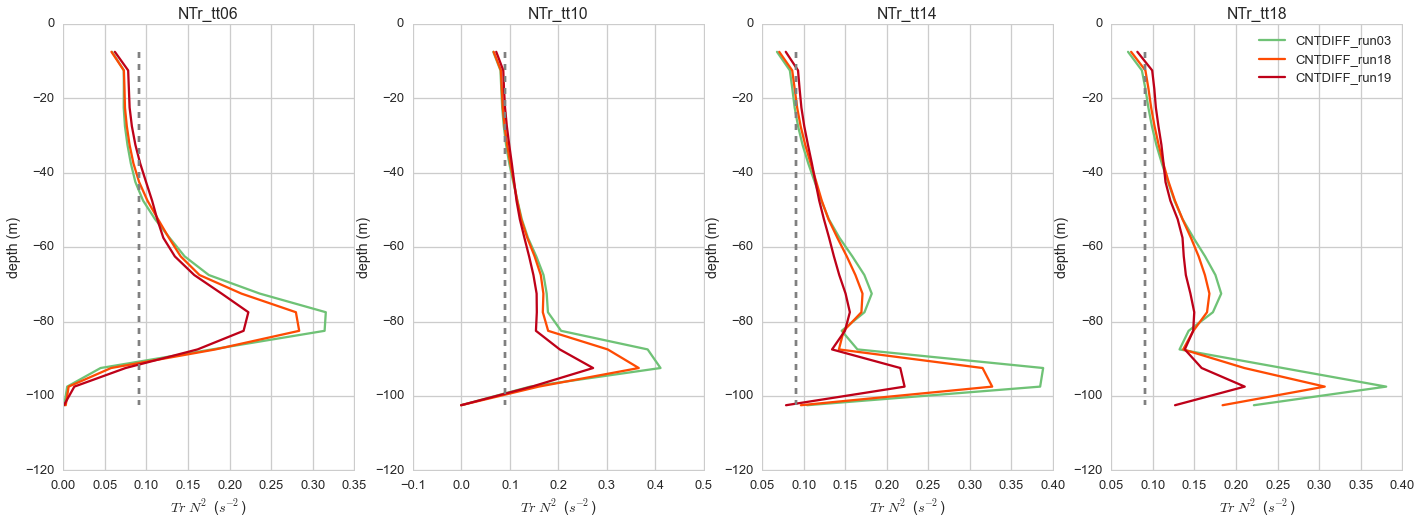

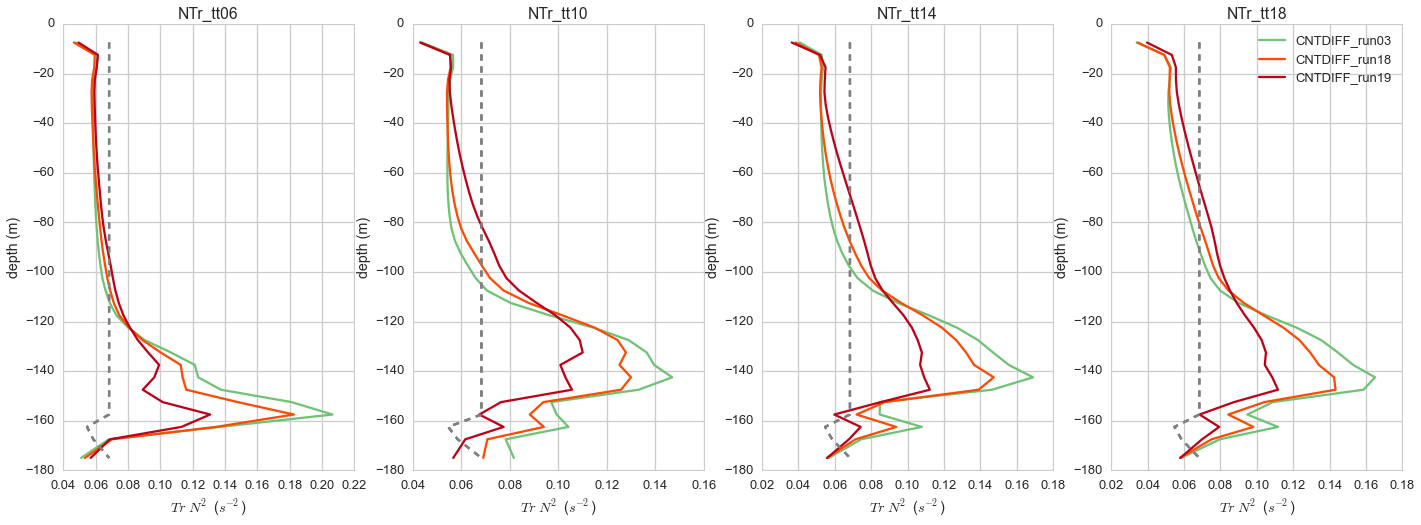

In [69]:
for stname in stations:
    
    figHand = plotAdvN2(stname)
    figName = ('results/figures/BuoyancyFrequency/N2Tr_f_%s.png' %stname)
    figHand.savefig(figName,format='png')

In [70]:
def plotTimeDepN2(st):
    fig1= plt.figure(figsize=(24,8))

    ax1 = plt.subplot(1,4,1)
    ax2 = plt.subplot(1,4,2)
    ax3 = plt.subplot(1,4,3)
    ax4 = plt.subplot(1,4,4)
    

    axs = [ax1,ax2,ax3,ax4]

    #sns.set_palette('CMRmap',11)
    sns.set_palette(color_pal)

    keys = ['NTr_tt02','NTr_tt04','NTr_tt06','NTr_tt08']
    key0 = ['NTr_tt00']

    for runs,trnum in zip(expNames,TrList):

        for key,a in zip(keys,axs):

            sname = st#'UpSl'
            filename1 = ('results/metricsDataFrames/N2Tr_%s_%s_%s.csv' % (trnum,runs,sname))

            df = pd.read_csv(filename1)
            col = df[key]
            col0 = df[key0]
            plotN(a,rc[1:-1],col,col0,runs,key)


    ax4.legend(loc=0)   
    plt.show()
    return fig1

        

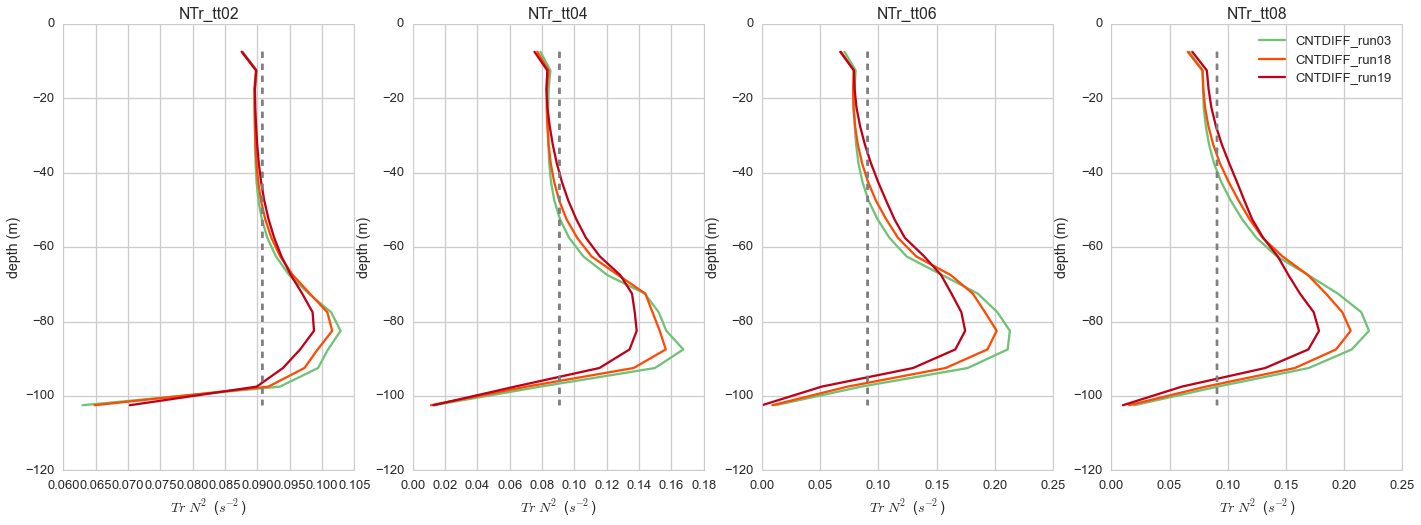

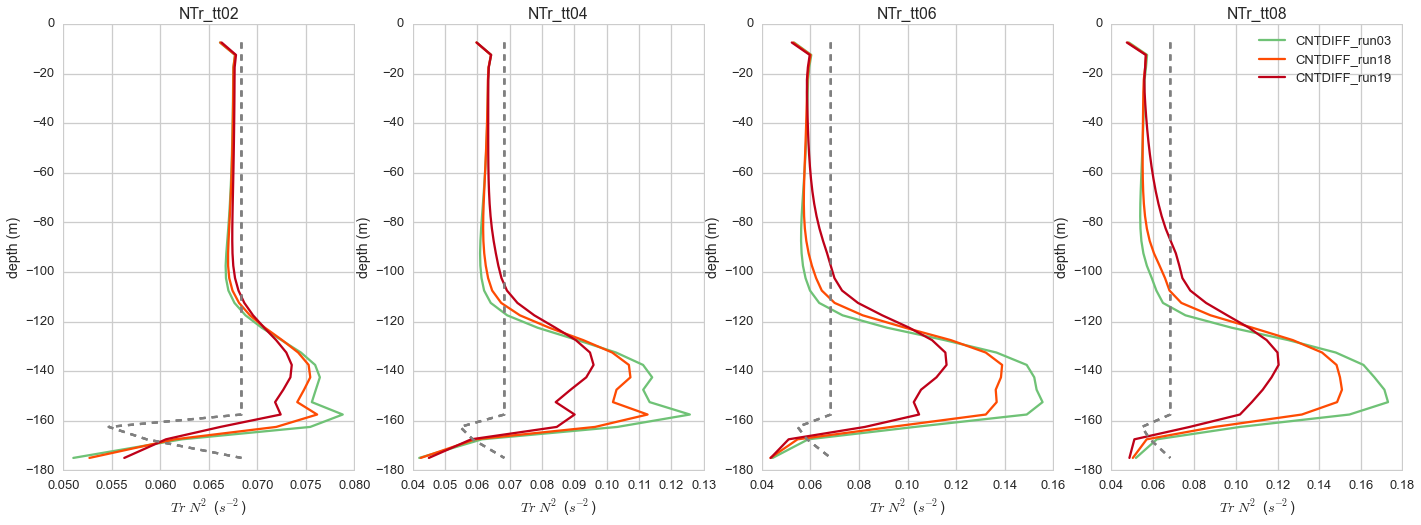

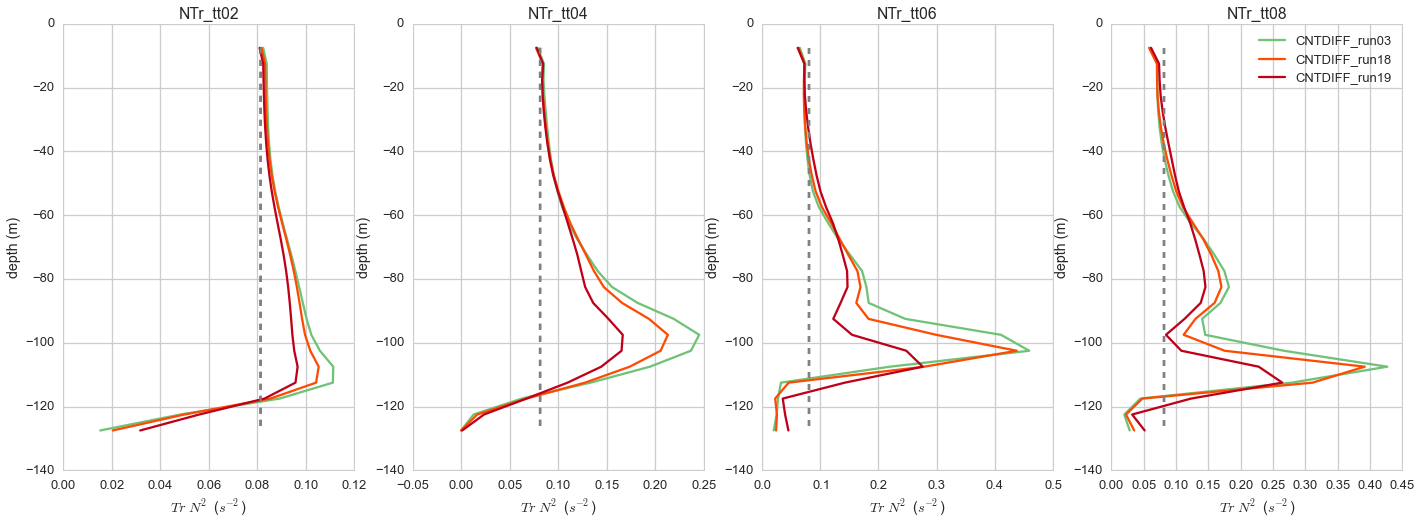

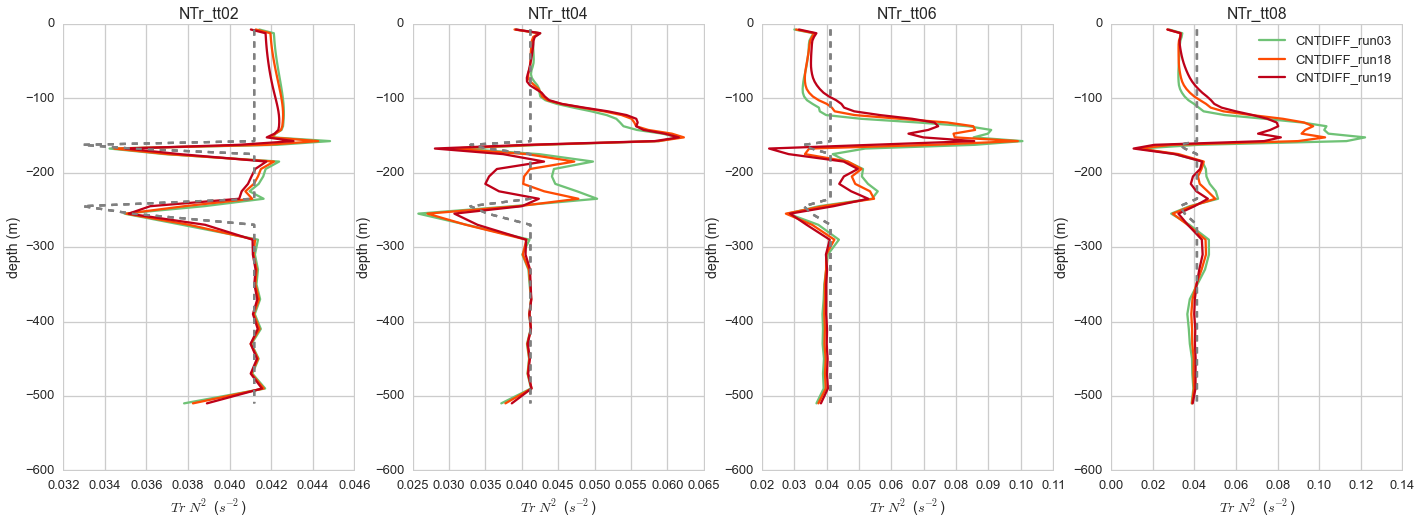

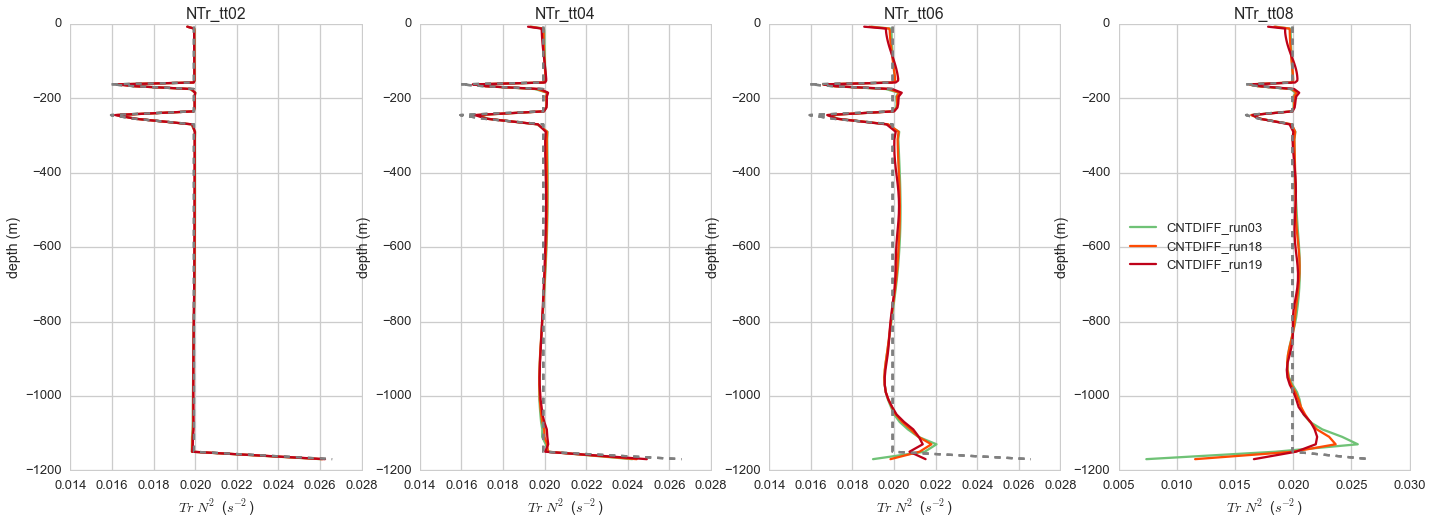

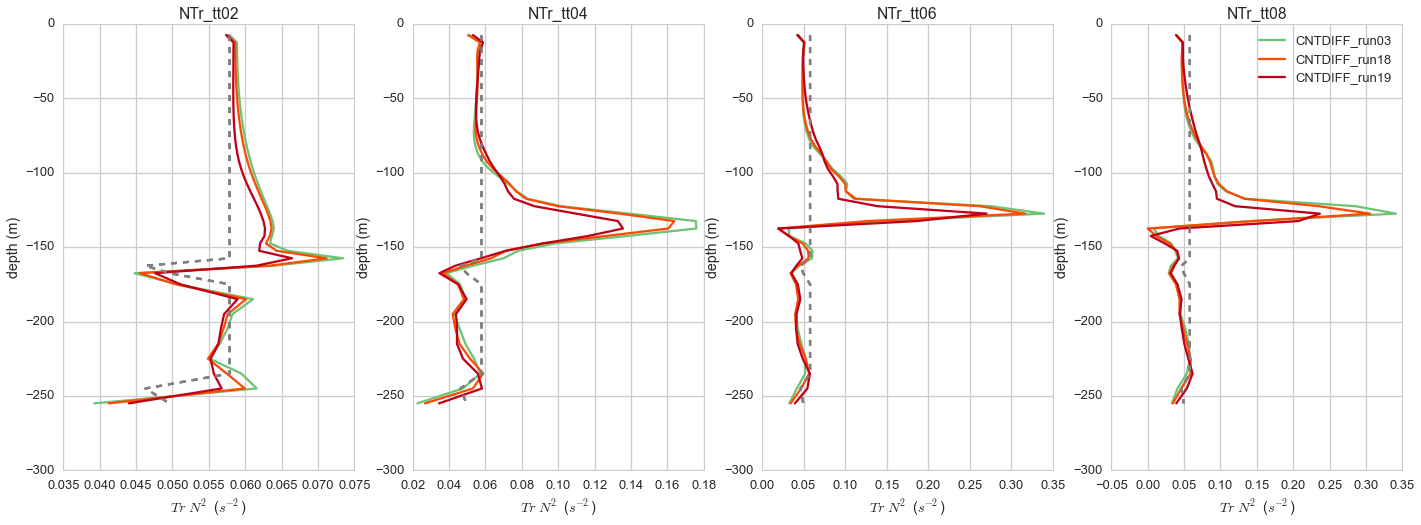

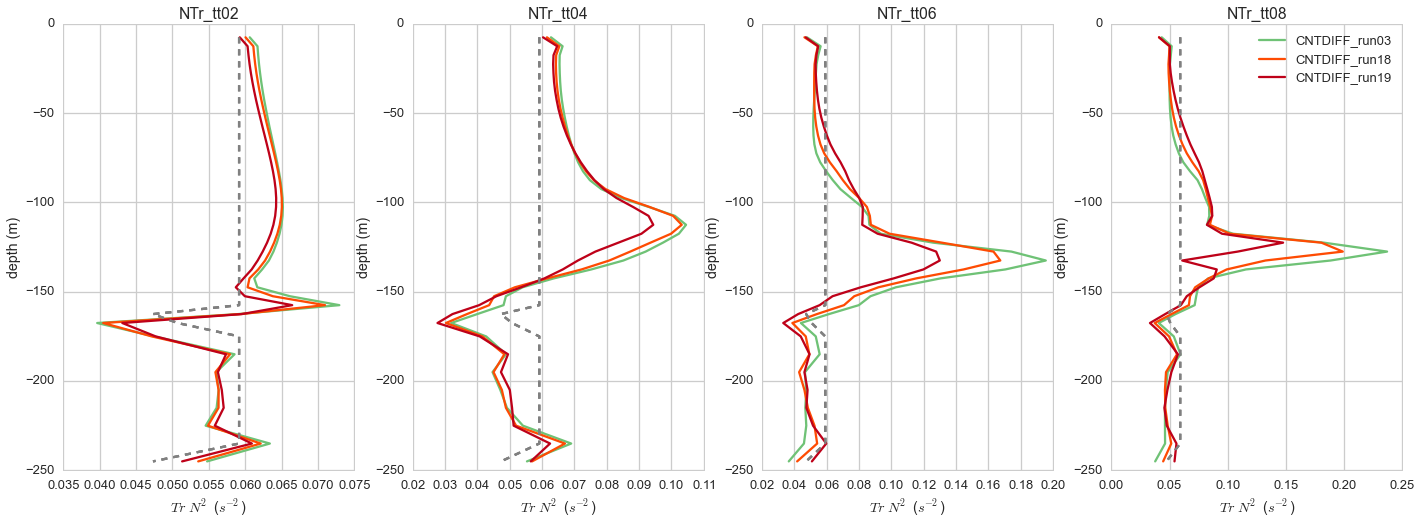

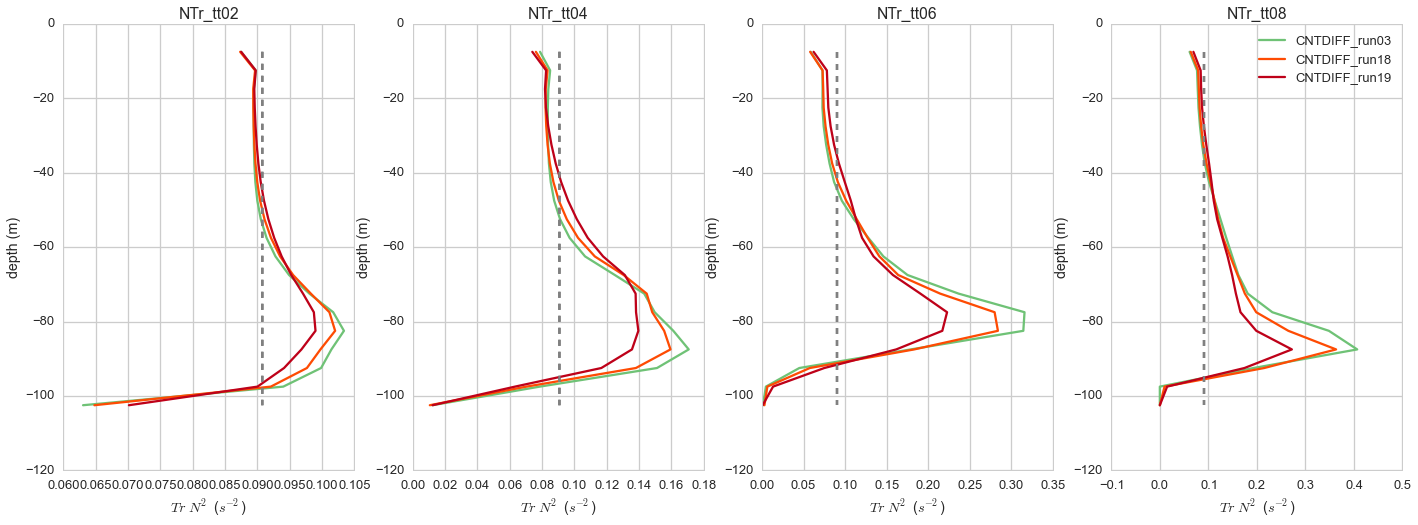

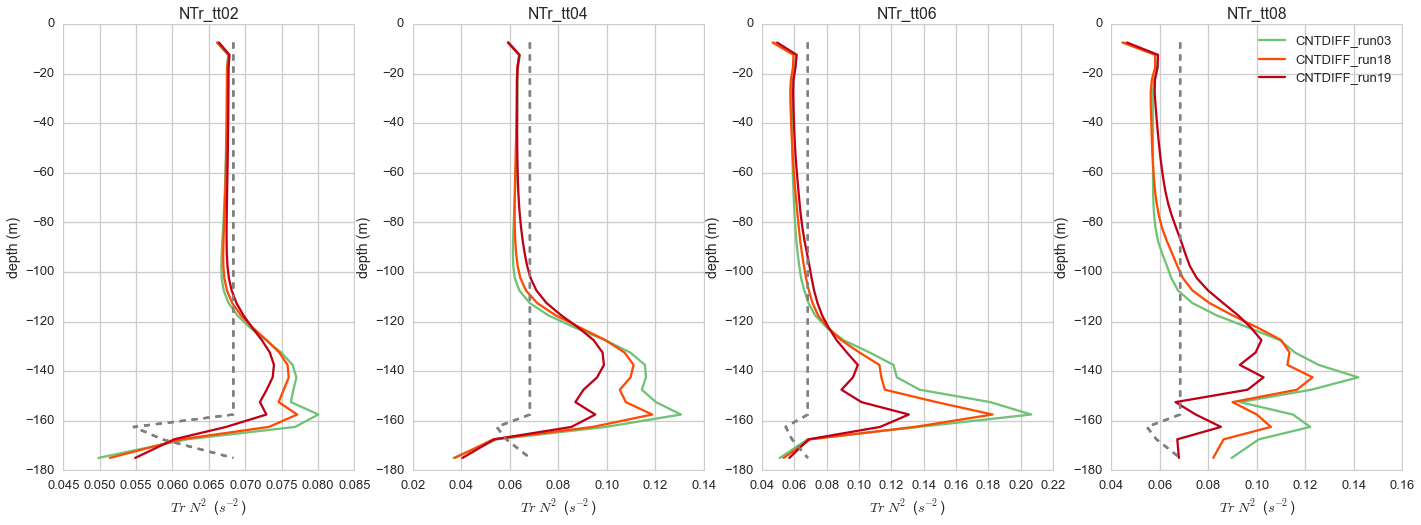

In [71]:
for stname in stations:
    
    figHand = plotTimeDepN2(stname)
    figName = ('results/figures/BuoyancyFrequency/TimeDepPhase_N2Tr_f_%s.png' %stname)
    figHand.savefig(figName,format='png')

In [72]:
np.sqrt(0.000006)

0.0024494897427831783

In [73]:
alpha = 2.0E-4 # 1/degC
beta = 7.4E-4
Ttop = 12.0
Tbot = 10.0
Stop = 32.0
Sbot = 33.0
rhoref = 999.79998779

N = np.sqrt((-9.81)* ((-alpha*(Ttop-Tbot)+beta*(Stop-Sbot))/(1200.0)) )
N

0.0030527856131736474

In [74]:
print(Ttop ,Tbot ,Stop ,Sbot )

(12.0, 10.0, 32.0, 33.0)
